# Automatic sleep staging

This notebook demonstrates how to perform automatic sleep staging of polysomnography data in YASA.

Please make sure to install the latest version of YASA first with: `pip install --upgrade yasa`.

In [1]:
import mne
import yasa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data loading

The automatic sleep staging function requires that the data are loaded using the [MNE Python package](https://mne.tools/stable/index.html). For instance, if your polysomnography data are stored in the standard European Data Fomat (.edf), you can use [this function](https://mne.tools/stable/generated/mne.io.read_raw_edf.html?highlight=read_raw_edf#mne.io.read_raw_edf) to load the data into Python.

In [2]:
# Let's load a nap recording, directly as an MNE Raw object
raw = mne.io.read_raw_fif('sub-02_mne_raw.fif', preload=True, verbose=False)
print('The channels are:', raw.ch_names)
print('The sampling frequency is:', raw.info['sfreq'])
raw

The channels are: ['F3', 'F4', 'C3', 'C4', 'O1', 'O2', 'EOG1', 'EOG2', 'EMG1']
The sampling frequency is: 100.0


<Raw | sub-02_mne_raw.fif, 9 x 294000 (2940.0 s), ~20.2 MB, data loaded>

In [3]:
# Let's now load the human-scored hypnogram, where each value represents a 30-sec epoch.
hypno = np.loadtxt('sub-02_hypno_30s.txt', dtype=str)
hypno

array(['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W',
       'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'N1', 'W', 'W', 'W',
       'W', 'N1', 'N1', 'N1', 'W', 'W', 'N1', 'N1', 'N1', 'N1', 'N2',
       'N2', 'N2', 'W', 'N1', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2',
       'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2',
       'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N3',
       'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3',
       'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'W',
       'W', 'W', 'W', 'W', 'W', 'W'], dtype='<U2')

## Automatic sleep staging

Automatic sleep stages classification can be done since YASA 0.4.0 using the [SleepStaging](https://raphaelvallat.com/yasa/build/html/generated/yasa.SleepStaging.html#yasa.SleepStaging) class. Make sure to read the [documentation](https://raphaelvallat.com/yasa/build/html/generated/yasa.SleepStaging.html#yasa.SleepStaging), which explains how the algorithm works.

In [4]:
# We first need to specify the channel names and, optionally, the age and sex of the participant
# - "raw" is the name of the variable containing the polysomnography data loaded with MNE.
# - "eeg_name" is the name of the EEG channel, preferentially a central derivation (e.g. C4-M1). This is always required to run the sleep staging algorithm.
# - "eog_name" is the name of the EOG channel (e.g. LOC-M1). This is optional.
# - "eog_name" is the name of the EOG channel (e.g. EMG1-EMG3). This is optional.
# - "metadata" is a dictionary containing the age and sex of the participant. This is optional.
sls = yasa.SleepStaging(raw, eeg_name="C4", eog_name="EOG1", emg_name="EMG1", metadata=dict(age=21, male=False))

In [5]:
# Getting the predicted sleep stages is now as easy as:
y_pred = sls.predict()
y_pred

array(['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W',
       'N2', 'N2', 'W', 'N2', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W',
       'W', 'W', 'W', 'N1', 'N2', 'W', 'N1', 'N1', 'N2', 'N2', 'N2', 'N2',
       'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2',
       'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2',
       'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N3', 'N3', 'N3', 'N3', 'N3',
       'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3',
       'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3',
       'W', 'N3', 'W', 'W', 'W'], dtype=object)

In [6]:
# What is the accuracy of the prediction, compared to the human scoring
accuracy = (hypno == y_pred).sum() / y_pred.size
print("The overall agreement is %.3f" % accuracy)

The overall agreement is 0.827


**Stage probabilities and confidence of the algorithm at each epoch**

In [7]:
# What are the predicted probabilities of each sleep stage at each epoch?
sls.predict_proba()

,N1,N2,N3,R,W
epoch,,,,,
0,0.019392,0.033505,0.001639,0.005495,0.939969
1,0.075906,0.040468,0.001974,0.012812,0.868840
2,0.012592,0.005998,0.000151,0.002452,0.978806
3,0.011069,0.006643,0.000039,0.001884,0.980364
4,0.011321,0.028442,0.000220,0.002674,0.957343
...,...,...,...,...,...
93,0.028755,0.078150,0.263581,0.010250,0.619264
94,0.018776,0.093083,0.575573,0.010271,0.302296
95,0.029719,0.036139,0.007347,0.005370,0.921425


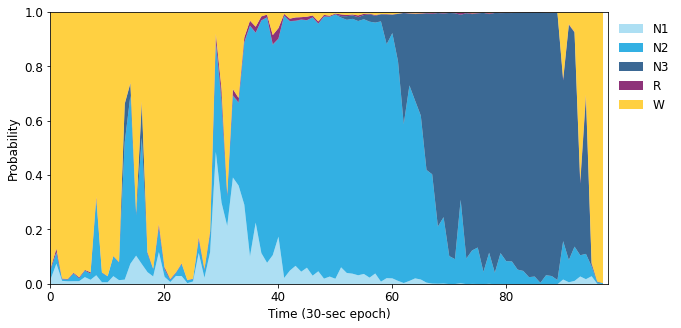

In [8]:
# Plot the predicted probabilities
sls.plot_predict_proba();

In [9]:
# From the probabilities, we can extract a confidence level (ranging from 0 to 1) for each epoch.
confidence = sls.predict_proba().max(1)
confidence

epoch
0     0.939969
1     0.868840
2     0.978806
3     0.980364
4     0.957343
        ...   
93    0.619264
94    0.575573
95    0.921425
96    0.989759
97    0.995417
Length: 98, dtype: float64

**Exporting to a CSV file**

In [10]:
# Let's first create a dataframe with the predicted stages and confidence
df_pred = pd.DataFrame({'Stage': y_pred, 'Confidence': confidence})
df_pred.head(6)

# Now export to a CSV file
# df_pred.to_csv("my_hypno.csv")

,Stage,Confidence
epoch,,
0,W,0.939969
1,W,0.868840
2,W,0.978806
3,W,0.980364
4,W,0.957343
5,W,0.974039


**Applying the detection using only a single EEG derivation**

In [11]:
# Using just an EEG channel (= no EOG or EMG)
y_pred = yasa.SleepStaging(raw, eeg_name="C4").predict()
y_pred

array(['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W',
       'W', 'N2', 'W', 'N2', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W',
       'W', 'W', 'W', 'N1', 'N1', 'W', 'N1', 'N1', 'N1', 'N2', 'N2', 'N2',
       'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2',
       'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2',
       'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N3',
       'N2', 'N2', 'N3', 'N2', 'N2', 'N3', 'N2', 'N3', 'N2', 'N2', 'N3',
       'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3',
       'N3', 'N3', 'W', 'W', 'W'], dtype=object)